# **TABLA DE CONTENIDO**

- [Distribuciones de frecuencia](#distribuciones_frecuencia)
- [Histogramas](#histogramas)
- [Gráfica de frecuencia acumulada](#frecuencia_acumulada)
- [Forma de una distribución](#forma_distribucion)
- [Diagramas de dispersión](#scatter_plot)
- [Tarea](#tarea)

# **Distribuciones de frecuencia** <a id="distribuciones_frecuencia"></a>

Para realizar un primer acercamiento a la descripción de una variable cuantitativa, lo usual es realizar una tabla de frecuencias. Sin embargo, en las variables cuantitativas **NO** existen **clases** o **niveles** en el sentido que vimos previamente en las variables cualitativas. De hecho, uno de los retos es determinar el número y la forma en que se construyen dichas *clases*.

Entre los métodos tenemos:

- Regla de Sturges:
$$k = 1+ log_{2}(n)$$

- Regla de la Raíz Cuadrada:
$$k = \sqrt{n}$$

- Regla de Rice:
$$k = 2\sqrt[3]{n}$$

Una vez determinado el número de clases se procede a establecer el ancho de estas $(w_{k})$, a continuación se presenta un método para calcularlo.

$$w_{k} = \frac{\max(x_n) - \min(x_n)}{k}$$

---

**Recuerde**

Una observacion $x_{n}$ solo puede pertenecer a una sola clase.


# **Histogramas** <a id="histogramas"></a>

> "Un histograma es un gráfico formado por *barras verticales* construidas sobre una línea horizontal que está delimitada por *intervalos* para la variable visualizada.
Los intervalos corresponden a las *clases* de una tabla de distribución de frecuencias. La altura de cada barra es proporcional al número de observaciones en ese intervalo. El número de observaciones puede visualizarse encima de las barras". (Thorne, 2023)


---
## Tabla de frecuencias

|Clases                      | Frecuencia absoluta    | Frecuencia Relativa | Densidad |
| :-------------------------:| :--------------------: |:--------------------:|:---------------:|
| $a_{1} < x_{i} \leq b_{1}$ | $f_{1}$                |$\frac{f_{1}}{n}$ |$\frac{f_{1}}{nw_{1}}$|
| $a_{2} < x_{i} \leq b_{2}$ | $f_{2}$                |$\frac{f_{2}}{n}$|$\frac{f_{2}}{nw_{k}}$|
| $\vdots$                   | $\vdots$               | $\vdots$ | $\vdots$ |
| $a_{k} < x_{i} \leq b_{k}$ | $f_{k}$                |$\frac{f_{2}}{n}$|$\frac{f_{2}}{nw_{k}}$|
|--------------------------|---|---|----|   

---

Donde $x_{i}$ es un elemento de la muestra (registro)

Note que tanto las frecuencia absoluta $(f_{k})$, frecuencia relativa $(fr_{k})$ y densidad $(d_{k})$ son la altura de las barras para cada una de las clases.

En este sentido se tiene que:
$$\sum_{k}(d_{k}×w_{k}) = 1$$


In [1]:
!pip install -U kaleido

In [2]:
import pandas as pd
import numpy as np
import kaleido
import plotly.express as px

# data URL
url = "https://raw.githubusercontent.com/apolineo11/PYEF/main/Cuadernos/Data/Melbourne_housing_FULL.csv"


# Load the data into a DataFrame
data_housing = pd.read_csv(url, parse_dates=['Date'], date_format='%d/%m/%Y').dropna(subset=['Price', 'Lattitude', 'Longtitude']).reset_index(drop=True)


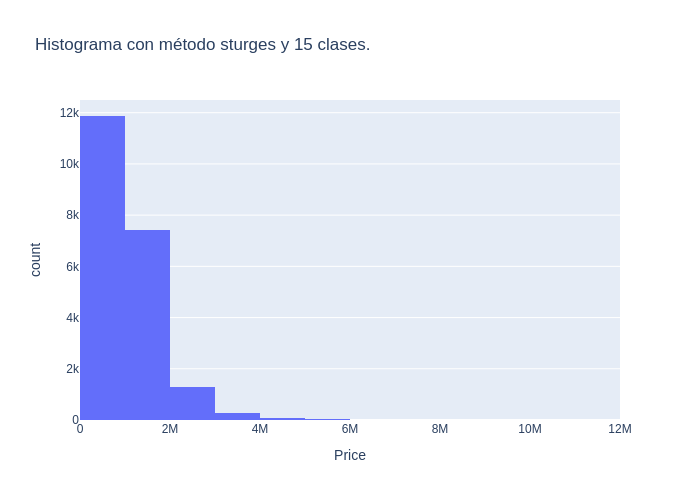

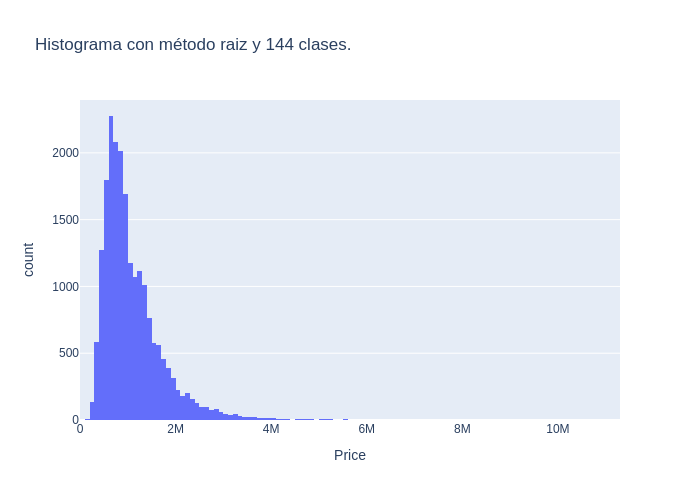

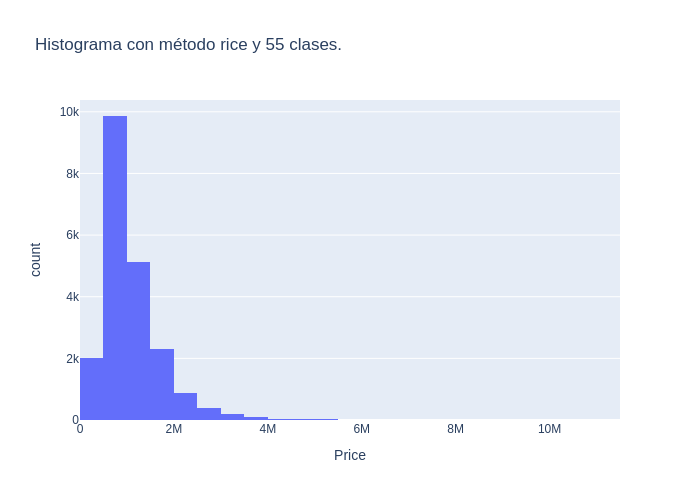

In [3]:
# Bins Histogramas
bins_sturges = int(1+np.log2(data_housing.shape[0]))
bins_raiz = int(np.sqrt(data_housing.shape[0]))
bins_rice = int(2*np.power(data_housing.shape[0],1/3))
bins_dict = {"sturges": bins_sturges, "raiz": bins_raiz, "rice": bins_rice}

# Histogram Métodos para el número de clases

for key, value in bins_dict.items():
    fig = px.histogram(data_housing, x='Price', nbins=value, title= f"Histograma con método {key} y {value} clases.")
    fig.show("png")


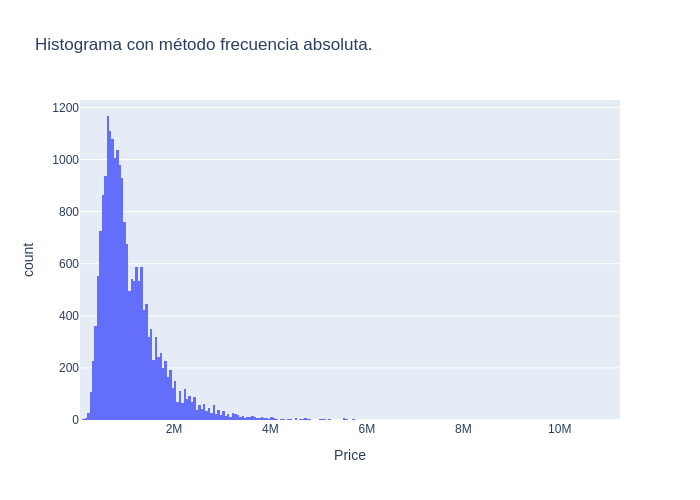

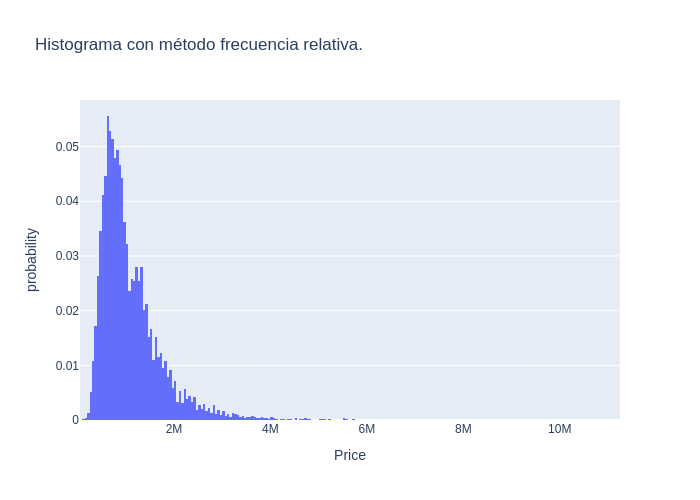

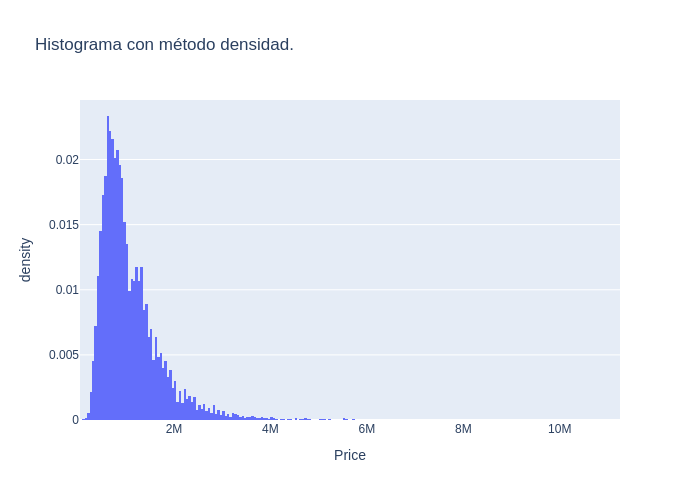

"\nhistnorm (str (default None)) – One of 'percent', 'probability', 'density', or 'probability density'\nIf None, the output of histfunc is used as is.\nIf 'probability', the output of histfunc for a given bin is divided by the sum of the output of histfunc for all bins.\nIf 'percent', the output of histfunc for a given bin is divided by the sum of the output of histfunc for all bins and multiplied by 100.\nIf 'density', the output of histfunc for a given bin is divided by the size of the bin.\nIf 'probability density', the output of histfunc for a given bin is normalized such that it corresponds to the probability that a random event whose distribution is described by the output of histfunc will fall into that bin\n"

In [4]:
# Tipos de Histograma
histnorm_dict = {"frecuencia absoluta": None, "frecuencia relativa": "probability", "densidad": "density"}

for key, value in histnorm_dict.items():
    fig = px.histogram(data_housing, x='Price', histnorm=value, title=f"Histograma con método {key}.")
    fig.show("png")

"""
histnorm (str (default None)) – One of 'percent', 'probability', 'density', or 'probability density'
If None, the output of histfunc is used as is.
If 'probability', the output of histfunc for a given bin is divided by the sum of the output of histfunc for all bins.
If 'percent', the output of histfunc for a given bin is divided by the sum of the output of histfunc for all bins and multiplied by 100.
If 'density', the output of histfunc for a given bin is divided by the size of the bin.
If 'probability density', the output of histfunc for a given bin is normalized such that it corresponds to the probability that a random event whose distribution is described by the output of histfunc will fall into that bin
"""

# **Gráfica de frecuencia acumulada** <a id="frecuencia_acumulada"></a>

> Es un gráfico que conecta puntos que son el porcentaje acumulativo de observaciones por debajo del límite superior de cada intervalo en una distribución de frecuencias acumulativas.

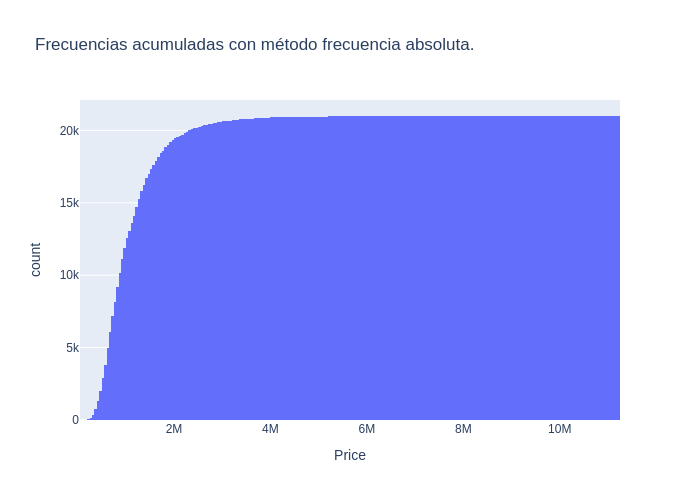

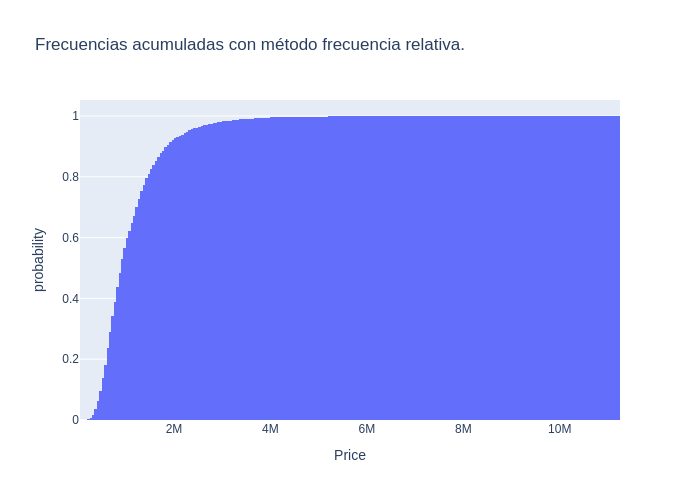

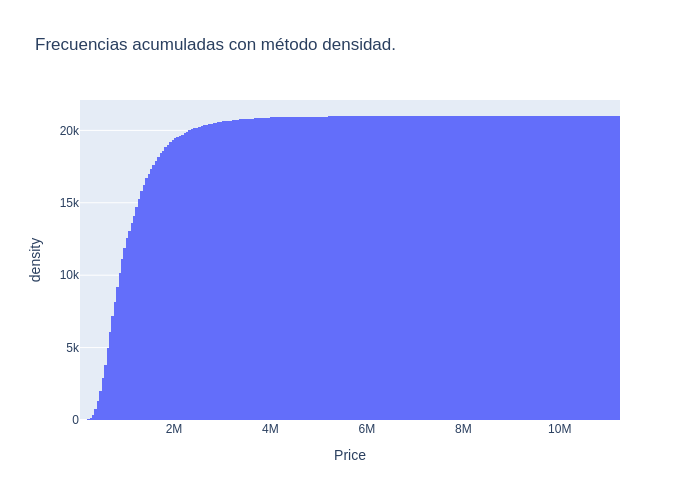

In [5]:
# Frecuencias acumuladas
for key, value in histnorm_dict.items():
    fig = px.histogram(data_housing, x='Price', histnorm=value, cumulative=True, title=f"Frecuencias acumuladas con método {key}.")
    fig.show("png")

# **Forma de una distribución** <a id="forma_distribucion"></a>

1. **Distribución Simétrica Unimodal**

    Una distribución es simétrica unimodal cuando tiene una única moda (un pico) y el histograma presenta una forma equilibrada a ambos lados de este pico.
    La simetría implica que los datos están distribuidos uniformemente alrededor del valor central. La media, la mediana y la moda suelen coincidir o estar muy cerca entre sí.
    Un ejemplo clásico es la distribución normal, que tiene una forma de "campana".

2. **Distribución Bimodal**

    Una distribución es bimodal cuando tiene dos picos distintos en su histograma.
    Esto indica que los datos pueden estar agrupados en torno a dos valores centrales, sugiriendo que los datos provienen de dos subgrupos o procesos diferentes.
    Las distribuciones bimodales son comunes cuando se combinan datos de diferentes poblaciones o cuando hay dos tendencias en los datos.

3. **Distribución Asimétrica Positiva** (Sesgo Positivo)

    Una distribución es asimétrica positiva o tiene un sesgo positivo cuando el histograma tiene un solo pico hacia el lado izquierdo y la cola se extiende hacia la derecha.
    En este caso, la mayoría de los valores se concentran en la parte baja de la escala, y unos pocos valores altos estiran la distribución hacia la derecha.
    La media es mayor que la mediana en distribuciones con sesgo positivo. Este tipo de distribución es común en ingresos, tiempos de espera, y otros fenómenos donde existen pocos valores altos.

4. **Distribución Asimétrica Negativa** (Sesgo Negativo)

    Una distribución es asimétrica negativa o tiene un sesgo negativo cuando el histograma tiene un solo pico hacia el lado derecho y la cola se extiende hacia la izquierda.
    En este caso, la mayoría de los valores se concentran en la parte alta de la escala, y unos pocos valores bajos estiran la distribución hacia la izquierda.
    La media es menor que la mediana en distribuciones con sesgo negativo. Este tipo de distribución se observa en algunas evaluaciones donde la mayoría obtiene puntuaciones altas y pocos valores bajos.

---

![Devore 2014](https://raw.githubusercontent.com/apolineo11/PYEF/main/Cuadernos/Imagenes/histogram_shape.png)

# Diagramas de dispersión <a id="scatter_plot"></a>

Usualmente, la exploración de datos busca descubrir relaciones entre multiples variables. Un caso especial es la visualización de **DOS** variables cuantitativas. Una herramienta básica es el diagrama de dispersión, este diagrama consiste una serie de puntos.

Sea $x_{i}$ un individuo de la muestra (registro), y las variables numéricas $g$ y $h$ medida en los individuos de la muestra. Entonces el punto $p_{i}$ para el individuo $x_{i}$ está definido así:

$$p_{i} = (g_{i}, h_{i})$$

Este gráfico se usa para visualizar relaciones "funcionales" entre las variables analizadas.



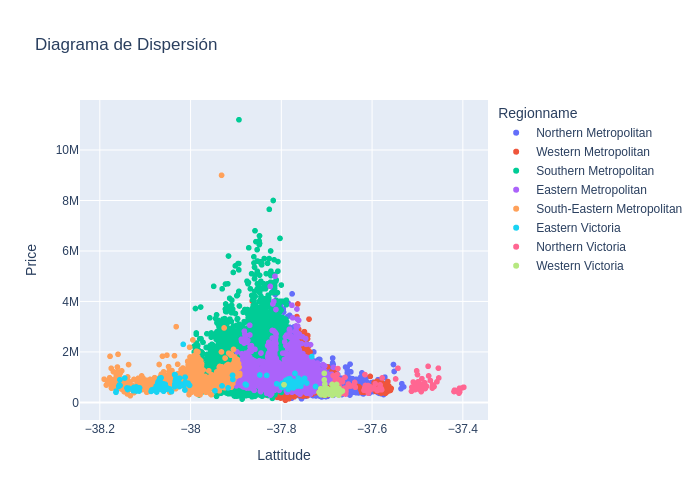

In [6]:
# scatter plot
fig = px.scatter(data_housing, x='Lattitude', y='Price', color='Regionname', title="Diagrama de Dispersión", labels={'x': 'Latitud', 'y': 'Precio'})
fig.show("png")

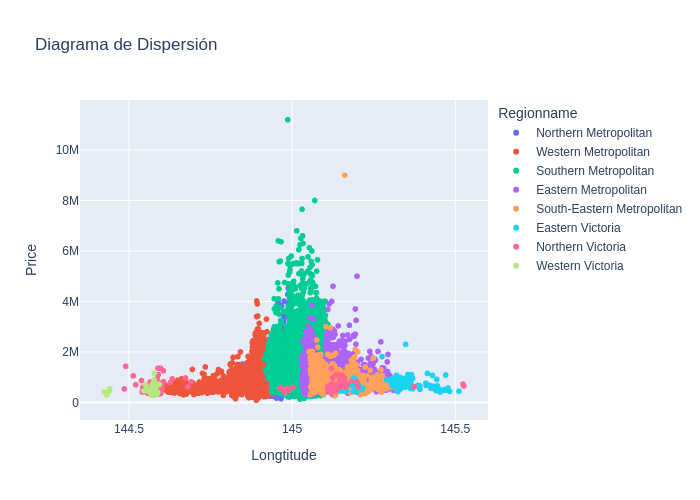

In [7]:
# scatter plot
fig = px.scatter(data_housing, x='Longtitude', y='Price', color='Regionname', title="Diagrama de Dispersión", labels={'x': 'Longitud', 'y': 'Precio'})
fig.show("png")

# Tarea <a id="Tarea"></a>

- Consulte 3 métodos adicionales para encontrar:
    - El número de clases k.
    - El ancho de las clases k.

- Explique cuales son los objetivos principales de cada uno de los métodos.
- Explique cuales son las diferencias y semejanzas con los mencionados aquí.

- Consultar que es el diagrama de tallos y hojas, sus características, objetivos, ventajas y limitaciones.
- Consultar que es el gráfico de puntos, sus características, objetivos, ventajas y limitaciones.